# IM939 - Lab 6 - Part 2 - Axes manipulation

One way to create potentially misleading visualisations is by manipulating the axes of a plot. Here we illustrate these using one of the FiveThirtyEight data sets, which are available [here](https://data.fivethirtyeight.com).

## Data wrangling

We are going to use polls from the recent USA presidential election. As before, we load and examine the data.

In [1]:
import pandas as pd 
import seaborn as sns
import altair as alt 

df_polls = pd.read_csv('presidential_poll_averages_2020.csv')
df_polls.head()

,cycle,state,modeldate,candidate_name,pct_estimate,pct_trend_adjusted
0,2020,Wyoming,11/3/2020,Joseph R. Biden Jr.,30.81486,30.82599
1,2020,Wisconsin,11/3/2020,Joseph R. Biden Jr.,52.12642,52.09584
2,2020,West Virginia,11/3/2020,Joseph R. Biden Jr.,33.49125,33.51517
3,2020,Washington,11/3/2020,Joseph R. Biden Jr.,59.34201,59.39408
4,2020,Virginia,11/3/2020,Joseph R. Biden Jr.,53.74120,53.72101


For our analysis, we are going to pick estimates from 11/3/2020 for the swing states of Florida, Texas, Arizona, Michigan, Minnesota and Pennsylvania.

In [2]:
df_nov = df_polls[
    (df_polls.modeldate == '11/3/2020')
]

df_nov = df_nov[
    (df_nov.candidate_name == 'Joseph R. Biden Jr.') |
    (df_nov.candidate_name == 'Donald Trump')
]

df_swing = df_nov[
    (df_nov['state'] == 'Florida') |
    (df_nov['state'] == 'Texas' ) |
    (df_nov['state'] == 'Arizona' ) |
    (df_nov['state'] == 'Michigan' ) |
    (df_nov['state'] == 'Minnesota' ) |
    (df_nov['state'] == 'Pennsylvania' ) 
]

df_swing

,cycle,state,modeldate,candidate_name,pct_estimate,pct_trend_adjusted
7,2020,Texas,11/3/2020,Joseph R. Biden Jr.,47.46643,47.44781
12,2020,Pennsylvania,11/3/2020,Joseph R. Biden Jr.,50.22000,50.20422
30,2020,Minnesota,11/3/2020,Joseph R. Biden Jr.,51.86992,51.84517
31,2020,Michigan,11/3/2020,Joseph R. Biden Jr.,51.17806,51.15482
46,2020,Florida,11/3/2020,Joseph R. Biden Jr.,49.09162,49.08035
53,2020,Arizona,11/3/2020,Joseph R. Biden Jr.,48.72237,48.70539
63,2020,Texas,11/3/2020,Donald Trump,48.57118,48.58794
68,2020,Pennsylvania,11/3/2020,Donald Trump,45.57216,45.55034
86,2020,Minnesota,11/3/2020,Donald Trump,42.63638,42.66826
87,2020,Michigan,11/3/2020,Donald Trump,43.20577,43.23326


We can look at the relative performance of the candidates within each state using a nested bar plot.

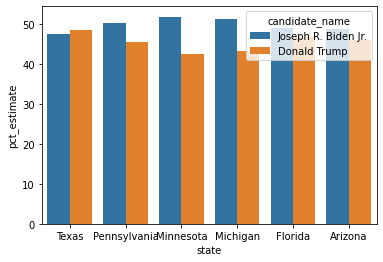

In [3]:
ax = sns.barplot(
    data = df_swing, 
    x = 'state', 
    y = 'pct_estimate', 
    hue = 'candidate_name')

Altering the axis increases the distance between the bars. Some might say that is misleading.

[(41.0, 52.0)]

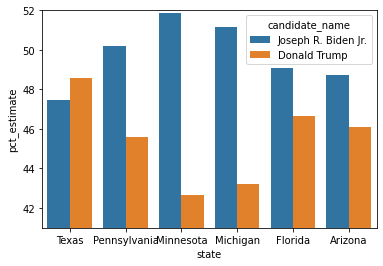

In [4]:
ax = sns.barplot(
    data = df_swing, 
    x = 'state', 
    y = 'pct_estimate', 
    hue = 'candidate_name')

ax.set(ylim=(41, 52))

What do you think?

How about if we instead put the data on the full 0 to 100 scale?

[(0.0, 100.0)]

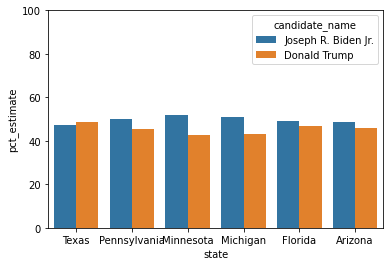

In [5]:
ax = sns.barplot(
    data = df_swing, 
    x = 'state', 
    y = 'pct_estimate', 
    hue = 'candidate_name')

ax.set(ylim=(0, 100))

We can do the same thing in Altair.

In [6]:
alt.Chart(df_swing).mark_bar().encode(
    x='candidate_name',
    y='pct_estimate',
    color='candidate_name',
    column = alt.Column('state:O', spacing = 5, header = alt.Header(labelOrient = "bottom")),
)

alt.Chart(...)

Note the need for the alt column. What happens if you do not provide an alt column?

Passing the domain option to the scale of the Y axis allows us to choose the y axis range.

In [8]:
alt.Chart(df_swing).mark_bar().encode(
    x='candidate_name',
    y=alt.Y('pct_estimate', scale=alt.Scale(domain=[42,53])),
    color='candidate_name',
    column = alt.Column('state:O', spacing = 5, header = alt.Header(labelOrient = "bottom")),
)

alt.Chart(...)

We can even be a bit tricky and stretch out the difference.

In [10]:
alt.Chart(df_swing).mark_bar().encode(
    x='candidate_name',
    y=alt.Y('pct_estimate', scale=alt.Scale(domain=[42,53])),
    color='candidate_name',
    column = alt.Column('state:O', spacing = 5, header = alt.Header(labelOrient = "bottom")),
).properties(
    width=20,
    height=600
)

alt.Chart(...)

It is not just bar plot that you can have fun with. Line plots are another interesting example.

For our simple line plot, we will need the poll data for a single state.

In [15]:
df_texas = df_polls[
    df_polls['state'] == 'Texas'
]

df_texas_bt = df_texas[
    (df_texas['candidate_name'] == 'Donald Trump') |
    (df_texas['candidate_name'] == 'Joseph R. Biden Jr.')
]

df_texas_bt.head()

,cycle,state,modeldate,candidate_name,pct_estimate,pct_trend_adjusted
7,2020,Texas,11/3/2020,Joseph R. Biden Jr.,47.46643,47.44781
63,2020,Texas,11/3/2020,Donald Trump,48.57118,48.58794
231,2020,Texas,11/2/2020,Joseph R. Biden Jr.,47.46643,47.44781
287,2020,Texas,11/2/2020,Donald Trump,48.57118,48.58794
455,2020,Texas,11/1/2020,Joseph R. Biden Jr.,47.45590,47.43400


The modeldate column is a string (object) and not date time. So we need to change that.

In [16]:
print('Before\n')
print(df_texas_bt.dtypes)
df_texas_bt['date'] = pd.to_datetime(df_texas_bt.loc[:,'modeldate'], format='%m/%d/%Y')
print('\nAfter\n')
print(df_texas_bt.dtypes)

Before

cycle                   int64
state                  object
modeldate              object
candidate_name         object
pct_estimate          float64
pct_trend_adjusted    float64
dtype: object

After

cycle                          int64
state                         object
modeldate                     object
candidate_name                object
pct_estimate                 float64
pct_trend_adjusted           float64
date                  datetime64[ns]
dtype: object


Create our line plot.

In [17]:
alt.Chart(df_texas_bt).mark_line().encode(
    y=alt.Y('pct_estimate', scale=alt.Scale(domain=[42,53])),
    x='date',
    color='candidate_name')

alt.Chart(...)

Sometimes multiple axis are used for each line, or in a combined line and bar plot.

The example [here](https://altair-viz.github.io/user_guide/scale_resolve.html) uses a dataframe with a column for each line. Our data does not have that.

In [18]:
df_texas_bt
our_df = df_texas_bt[['candidate_name', 'pct_estimate', 'date']]
our_df

,candidate_name,pct_estimate,date
7,Joseph R. Biden Jr.,47.46643,2020-11-03
63,Donald Trump,48.57118,2020-11-03
231,Joseph R. Biden Jr.,47.46643,2020-11-02
287,Donald Trump,48.57118,2020-11-02
455,Joseph R. Biden Jr.,47.45590,2020-11-01
...,...,...,...
28931,Donald Trump,49.09724,2020-02-29
28963,Joseph R. Biden Jr.,45.30901,2020-02-28
28995,Donald Trump,49.09676,2020-02-28
29027,Joseph R. Biden Jr.,45.30089,2020-02-27


Pivot table allows us to reshape our dataframe.

In [19]:
our_df = pd.pivot_table(our_df, index=['date'], columns = 'candidate_name')
our_df.columns = our_df.columns.to_series().str.join('_')
our_df.head()

,pct_estimate_Donald Trump,pct_estimate_Joseph R. Biden Jr.
date,,
2020-02-27,49.07925,45.30089
2020-02-28,49.09676,45.30901
2020-02-29,49.09724,45.30896
2020-03-01,49.09724,45.30895
2020-03-02,48.91861,45.37694


Date here is the dataframe index. We want it to be a column.

In [20]:
our_df['date1'] = our_df.index
our_df.columns = ['Trump', 'Biden', 'date1']
our_df.head()

,Trump,Biden,date1
date,,,
2020-02-27,49.07925,45.30089,2020-02-27
2020-02-28,49.09676,45.30901,2020-02-28
2020-02-29,49.09724,45.30896,2020-02-29
2020-03-01,49.09724,45.30895,2020-03-01
2020-03-02,48.91861,45.37694,2020-03-02


Creating our new plot, to fool all those people who expect Trump to win in Texas.

In [21]:
base = alt.Chart(our_df).encode(
        alt.X('date1')
)

line_A = base.mark_line(color='#5276A7').encode(
    alt.Y('Trump', axis=alt.Axis(titleColor='#5276A7'), scale=alt.Scale(domain=[42,53]))
)

line_B = base.mark_line(color='#F18727').encode(
    alt.Y('Biden', axis=alt.Axis(titleColor='#F18727'), scale=alt.Scale(domain=[35,53]))
)

alt.layer(line_A, line_B).resolve_scale(y='independent')

alt.LayerChart(...)

Did you see what I did there?

Of course, mixed axis plots are rarely purely line plots. Instead they can be mixes of different axis. For these and other plotting mistakes, the economist has a nice article [here](https://medium.economist.com/mistakes-weve-drawn-a-few-8cdd8a42d368). You may want to try some of these plots with this data set or the world indicators dataset from a few weeks ago.